In [1]:
from tensorflow import keras 
from sklearn.model_selection import train_test_split

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# 데이터 전처리

- 픽셀값을 0 ~ 1 사이로 스케일링

- 2차원 배열을 1차원 배열로 변환

- 훈련, 검증 나누기

In [3]:
scaled_train = x_train / 255
scaled_train = scaled_train.reshape(-1, 28*28)

scaled_train, scaled_val, y_train, y_val = train_test_split(
    scaled_train,
    y_train,
    test_size=0.2,
    stratify=y_train,
    random_state=34
)

# 심층 신경망 구성

- 인공 신경망에 층을 추가한 구조

<img src ="./image/ml_perceptron.png">

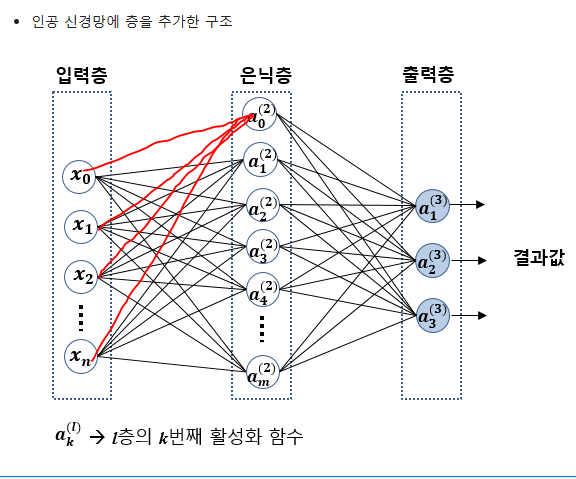
- 이미지 오류 입니다

- 단층 퍼셉트론과의 차이는 입력층과 출력층 사이에 밀집츠잉 추가된 것
    - 입력층과 출력층 사이에 모든 층을 은닉층(hidden layer)이라고 부름

<img src ="./image/activation.jpg">

- 활성화 함수(activation function)
    -  활성화 함수를 쓰는 이유
    -  예) a* 4 + 2 = b
    -  b * 3 -5 = c
    -  위 2개의 식은 단순화 가능

- 은닉층이 선형적ㅇ니 산술 계산만 한다면 층이 깊어지더라도 계산식이 단순화되어 학습효율이 떨어짐
    - 따라서 활성화 함수로 선형 계산을 비선형 계산으로 비틀어주느 과정이 필요

- 출력층에 적용하는 활성화 함수와 은닉층에 적용하는 활성화 함수는 차이가 있음
    - 출력층의 활성화 함수
        - 출력층 함수 라고도 부름
        - 결과물을 적절한 형식으로 출력하도록 유도해서, 데이터셋과 잘 비교할 수 있도록 하는 역할
        - 조율에 제한이 있음(이진 분류 : 시그모이드, 다중 분류 : 소프트 맥스)
 
    - 은닉층의 활성화 함수
        - 여러 겹의 layer 들 사이에서 사용됨
     
        - 출력층 함수에 비해 선택이 자유로움
     
        - 대표적인 활성화 함수 : ReLU
     
        - **모든 신경망의 은닉층에는 항상 활성화 함수가 있음**

In [4]:
# 입력층 
inputs = keras.Input(shape = (784,))

# 은닉층(내마음~, 가이드라인이지만 반드시...라는것은 없다~~~~~~~~~~~)
dense1 = keras.layers.Dense(100, activation = "sigmoid") 

# 출력층
dense2 = keras.layers.Dense(10, activation = "softmax")

- dense1
    - 은닉층
      
    - 100개의 유닛을 가진 밀집층
        - 유닛 개수를 정하는 것은 특별한 기준이 없음
     
        - 다만 출력층의 유닛보다는 많게 하는 것을 추천
            - 은닉층의 유닛이 출력층보다 적다면 전달되는 정보량이 부족해질 수 있음
         
    - 활성화 함수는 시그모이드
 
- dense2
    - 출력층
 
    - 10개의 클래스로 분류하므로 10개의 유닛
 
    - 다중 분류이기 때문에 활성화 함수는 소프트맥스

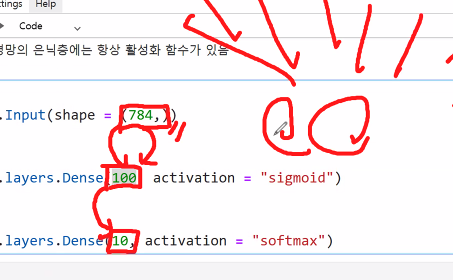

In [5]:
model = keras.Sequential()

In [6]:
# 가장 처음 등장하는 은닉층 부터 마지막 출력층까지 순서대로 추가해야함
model.add(inputs)
model.add(dense1)
model.add(dense2)

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

- 모델 요약 정보
    - 모델에 포함된 층들이 순서대로 나열
        - 첫 은닉층부터 출력층 까지
    - 층마다 이름, 클래스, 출력 크기, 파라미터 개수가 나옴
        - 이름
            - 층을 만들 때 name 매개변수로 지정 가능
            - 지정하지 않으면 기본값 "dense"
        - Output Shape
            - 출력 크기
            - (None, 100)
                - 미니배치 경사하강법이라서 None 에는 모든 데이터가 들어가지는 않는다.
                - 첫 번째 차원은 샘플의 개수를 의미
                - 샘플의 개수가 None 인 이유는 한 번에 몇 개의 이미지씩 사용할 지 알 수 없기 때문에 어떤 배치 크기에도 유연하게 대응할 수 있도록 None으로 설정
                - 케라스는 기본적으로 미니배치 경사하강법을 사용
                - batch_size를 설정하지 않으면 기본값 32
                - 따라서 input_shape 나 output_shape 의 첫 번째 차원을 **배치 차원**이라고도 부름
                  
            - 두 번째 차원은 출력 개수
                - 100개의 유닛에서 결과가 나오기 때문에 출력 개수가 100
             
                - 즉, 각 이미지마다 784개의 픽셀값이 은닉층을 통과하면서 100개의 특성으로 압축됨
             
        - Param
            - 모델 파라미터 개수
         
            - dense층(은닉층)
                - 784픽셀의 입력값과 100개의 유닛의 모든 조합의 대한 가중치 + 각 유닛의 절편 1개씩
                - 780 * 100 + 100 = 78500
            - dense_1층
         
            - 앞 은닉충의 100개의 유닛과 10개의 출력층 유닛의 모든 조합에 대한 가중치 + 각 유니스이 절편 1개씩
         
            - 100 * 10 = 10 = 1010
         
    - Non-trainable params
        - 훈련되지 않는 파라미터
        - 경사하강법으로 훈련되지 않는 파라미터를 가진 층이 있다면 여기에 표시됨

## 층을 추가하는 다른 방법

In [8]:
model = keras.Sequential([
    keras.Input(shape = (784,)),
    # 은닉층
    keras.layers.Dense(100, activation = "sigmoid", name = "hidden"),
    # 출력층
    keras.layers.Dense(10, activation = "softmax", name = "output"),
], name = "Fashion_MNIST_model")

In [9]:
model.summary()

Model: "Fashion_MNIST_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden (Dense)                       │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

- 여러 모델과 많은 층을 사용할 때 구분을 위해서 name 매개변수를 사용

# 모델 훈련

In [10]:
model.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [11]:
model.fit(scaled_train, y_train, epochs = 5, batch_size=32)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8065 - loss: 0.5696
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8501 - loss: 0.4114
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8630 - loss: 0.3769
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8716 - loss: 0.3547
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8781 - loss: 0.3378


- 단층보다 다층이 loss 가 줄었다!

- 은닉층의 추가로 훈련세트에 대한 성능이 향상됨

# 활성화 함수

## 시그모이드 

<img src = "./image/sigmoid.png">

- 초창기 인공신경망의 은닉충에서 많이 상요된 활성화 함수는 시그모이드

- 입력값이 아무리 크더라도 0 ~ 1 사이의 값으로 출력되어 출력갑싕 범위가 너무 좁음

- 경사하강법 수행 시에 기울기가 0에 수렴하는 기울기 소실이 발생할 수 있음

- 층이 많아지고 복잡해질수록 그 효과가 누적

## 렐루 함수

<img src ="./image/relu.png">

- 입력이 양수일 경우 마치 활서오하 함수가 없는 것처럼 그냥 입력을 통과시키고, 음수일 경우에는 0 이 됨

- 표현식 max(0,z)

# Flatten

- 지금까지는 패션 MNIST 데이터가 28*28 크기이기 때문에 인공신경망에 주입하기 전에 reshape 를 이용하여 1차원으로 펼쳤음

- 같은 기능을 위해서 케라스에서는 Faltten 층을 제공함

    - 샘플의 개수 차원을 제외하고 나머지 모든 입력 차원을 일렬로 펼쳐주는 역할
    
    - 가중치나 절편 없음

- 하지만 입력층과 은닉층 사이에 추가하기 때문에 편의상 층으로 불림 신경망의 깊ㅍ이가 깊어진 것으로 보지않음

In [12]:
model = keras.Sequential()
model.add(keras.Input(shape =(28, 28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

- Flatten 층의 파라미터는 0

- Flatten 층을 추가하면 차원을 짐작할 수 있다는 것이 장점

- 784개의 첫번째 은닉층에 전달된 다는 것이 명확함

- 전처리 과정을 모델에 포함시키는 것이 케라스 API 철학중하나

# 새 모델을 위한 데이터를 다시 준비

In [14]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

scaled_train = x_train / 255

scaled_train, scaled_val, y_train, y_val = train_test_split(
    scaled_train,
    y_train,
    test_size=0.2,
    stratify=y_train,
    random_state=34
)

In [15]:
model.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [16]:
model.fit(scaled_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8110 - loss: 0.5327
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8577 - loss: 0.3924
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8724 - loss: 0.3517
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8798 - loss: 0.3304
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8881 - loss: 0.3159


In [17]:
model.evaluate(scaled_val, y_val)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - accuracy: 0.8773 - loss: 0.3656


[0.365630567073822, 0.8772500157356262]

# 딥러닝의 하이퍼 파라미터

- 하이퍼파라미터 : 모델이 학습하지 않아 사람이 지정해 주어야하는 파라미터

- 인공신경망에서 하이퍼 파라미터의 종류
    - 은닉층 개수
    
    - 은닉층의 유닛 개수
    
    - 활성화 함수
    
    - 층의 종류
        - 밀집층, CNN, RNN
    
    - 미니배치 개수(batch_size)
    
    - 반복횟수(epochs)
    
    - 옵티마이저(optimizer)
    
    - 옵티마이저이 학습률

## 옵티마이저

- 케라스에서는 기본적으로 경사하강법 알고리즘(RMSprop)를 사용

- 이 외에도 다양한 경사하강법 알고리즘을 제공, 이를 옵티마이저라고 부름

<img src ="./image/optimizer.png">

In [18]:
# sgd 옵티마이저를 사용하려면
sgd = keras.optimizers.SGD()

model.compile(optimizer=sgd, loss = "sparse_categorical_crossentropy",metrics = ["accuracy"])

In [19]:
# 위와 동일한 코드
# 원래는 위의 코드처럼 각각의 ㅋ믈래스 객체를 만들어서 사용하는 것이 정석
# 번거로움을 피하기 위해 "sgd"라고 입력하면 자동으로 SGD 클래스 객체를 생성
model.compile(optimizer="sgd", loss = "sparse_categorical_crossentropy",metrics = ["accuracy"])

In [20]:
# 옵티마이저의 학습률을 조절하고 싶다면
sgd = keras.optimizers.SGD(learning_rate = 0.1)

### 옵티마이저의 종류

- Momentum(관성방향)
    - SGD 클래스에서 momentum 기본값은 0
 
    - momentum을 0보다큰 값으로 지정하면 모멘텀 최적화 (momentum optimization)를 사용
 
    - 일반적으로 momentum 매개변수는 0.9 이상을 지정
 
- Nag(Nesterov Accelerated Gradient)
    - SGD 클래스이 nesterov 매개변수를 기본값 False 에서 True 로 바꾸면 네스테로프 모멘텀 최적화랄 사용할 수 있음
 
    - 대부분의 경우 네스테로프 모멘텀 최적화가 기본 경사하강법보다는 더 나은 성능을 제공

In [23]:
# 네스테로프 모멘텀 최적화
nag = keras.optimizers.SGD(momentum=0.9, nesterov=True)

In [24]:
nag

- 적응적 학습률
    - 모델이 최적점에 가까이 갈수록 학습률을 낮춤
        - 안정적으로 최적점에 수렴할 가능성이 높음
    - 적응적 학습률을 사용하는 대표적인 옵티마이저
        - ADagrad, RMSProp

In [25]:
# Adagrad
adagrad = keras.optimizers.Adagrad()

# RMSprop
rmsporp = keras.optimizers.RMSprop()

- 위의 모멘텀 최적화와 적응적 학습률을 접목한 것이 Adam
- 기본적으로 가자아 많이 쓰이는 옵티마이저

In [28]:
model = keras.Sequential()
model.add(keras.Input(shape = (28,28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation ="relu"))
model.add(keras.layers.Dense(10, activation ="softmax"))

In [29]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [31]:
model.fit(scaled_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8169 - loss: 0.5219
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8589 - loss: 0.3916
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8735 - loss: 0.3515
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8783 - loss: 0.3289
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8874 - loss: 0.3089


In [32]:
model.evaluate(scaled_val, y_val)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8697 - loss: 0.3736   


[0.3736337125301361, 0.8696666955947876]